<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek36.do.txt  -->
<!-- dom:TITLE: Exercises week 36 -->

# Exercises week 36
**September 2-6, 2024**

Date: **Deadline is Friday September 6 at midnight**

## Overarching aims of the exercises this week

This set of exercises form an important part of the first project. The
analytical exercises deal with the material covered last week on the
mathematical interpretations of ordinary least squares and of Ridge
regression. The numerical exercises can be seen as a continuation of
exercise 3 from week 35, with the inclusion of Ridge regression. This
material enters also the discussions of the first project.

## Exercise 1: Analytical exercises

The aim here is to derive the expression for the optimal parameters
using Ridge regression. Furthermore, using the singular value
decomposition, we will analyze the difference between the ordinary
least squares approach and Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the
optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

which we can also write as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. One can require as part of the optimization problem 
that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. We will not implement that here.

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. In the optimization, we will not require that the latter is satisfied.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

### b) The singular value decomposition

Here we will use the singular value decomposition of an $n\times p$ matrix $\boldsymbol{X}$ (our design matrix)

$$
\boldsymbol{X}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

to study properties of Ridge regression and ordinary least squares regression.
Here $\boldsymbol{U}$ and $\boldsymbol{V}$ are orthogonal matrices of dimensions
$n\times n$ and $p\times p$, respectively, and $\boldsymbol{\Sigma}$ is an
$n\times p$ matrix which contains the singular values only. This material was discussed during the lectures of week 35.

Show that you can write the 
OLS solutions in terms of the eigenvectors (the columns) of the orthogonal matrix  $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  = \sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y}.
$$

For Ridge regression, show that the corresponding equation is

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$. 

Give an interpretation of the results.  [Section 3.4 of Hastie et al's textbook gives a good discussion of the above results](https://link.springer.com/book/10.1007/978-0-387-84858-7).

## Exercise 2: Adding Ridge Regression


In [94]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


This exercise is a continuation of exercise 3 from week 35, see <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/exercisesweek35.html>. We will use the same function to
generate our data set, still staying with a simple function $y(x)$
which we want to fit using linear regression, but now extending the
analysis to include the Ridge regression method.

In this exercise you need to include the same elements from last week, that is
1. scale your data by subtracting the mean value from each column in the design matrix.

2. perform a split of the data in a training set and a test set.


In [95]:
# input data
np.random.seed(1234)

n = 100
print(f"number of data points: {n}")
noise_coeff = 1.5

lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]
polynomial_degrees = [5, 10, 15]

x_full = np.linspace(-1, 1, n)
print(x_full.shape)
y_full = np.exp(-x_full**2) + 1.5 * np.exp(-(x_full-2)**2) + noise_coeff * np.random.normal(0, 0.1, x_full.shape)
print(y_full.shape)

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2)

# fancier display than numpy print
results_frame_train = pd.DataFrame({"x_train":x_train, "y_train":y_train})
results_frame_test = pd.DataFrame({"x_test":x_test, "y_test":y_test})
display(results_frame_test)

# mean value subtraction is for design matrix, we need the polynomial degree P to make a design matrix
# want to use different Ps, so subtract mean later when evaluating model

number of data points: 100
(100,)
(100,)


,x_test,y_test
0,0.818182,0.895101
1,0.151515,1.021199
2,0.292929,1.154221
3,-0.696970,0.616583
4,-0.797980,0.702100
5,-0.777778,0.695568
6,-0.070707,0.995096
7,-1.000000,0.438780
8,0.898990,1.014459
9,0.656566,1.094731



The addition to the analysis this time is the introduction of the hyperparameter $\lambda$ when introducing Ridge regression.

Extend the code from exercise 3 from [week 35](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/exercisesweek35.html) to include Ridge regression with the hyperparameter $\lambda$. The optimal parameters $\hat{\beta}$ for Ridge regression can be obtained by matrix inversion in a similar way as done for ordinary least squares. You need to add to your code the following equations

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The ordinary least squares result you encoded last week is given by

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

Use these results to compute the mean squared error for ordinary least
squares and Ridge regression first for a polynomial of degree five
with $n=100$ data points and five selected values of
$\lambda=[0.0001,0.001, 0.01,0.1,1.0]$. Compute thereafter the mean
squared error for the same values of $\lambda$ for polynomials of degree ten
and $15$. Discuss your results for the training MSE and test MSE with
Ridge regression and ordinary least squares.

In [96]:
def make_feature_matrix(x, P):
    X = np.zeros((len(x), P-1))
    # leave out intercept by excluding the first row of X
    for exponent in range(1,P):
        X[:,exponent-1] = x[:]**exponent

    return X

def scale_X_and_y(X, y):
    """Scale by subtracting mean from each column"""
    y_mean = np.mean(y)
    X_mean = np.mean(X,axis=0)

    X = X - X_mean
    y = y - y_mean
    return X, y

def linear_regression_model_OLS(X, y):
    beta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    # from https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html#linear-regression-basic-elements

    return beta

def linear_regression_model_Ridge(X, y, lambda_value):
    beta = np.linalg.pinv( X.T.dot(X) + lambda_value * np.identity(X.shape[1]) ).dot(X.T).dot(y)
    #print(lambda_value * np.identity(X.shape[1]))

    return beta

def linear_prediction(X, beta):
    y_tilde = X @ beta

    return y_tilde   
    


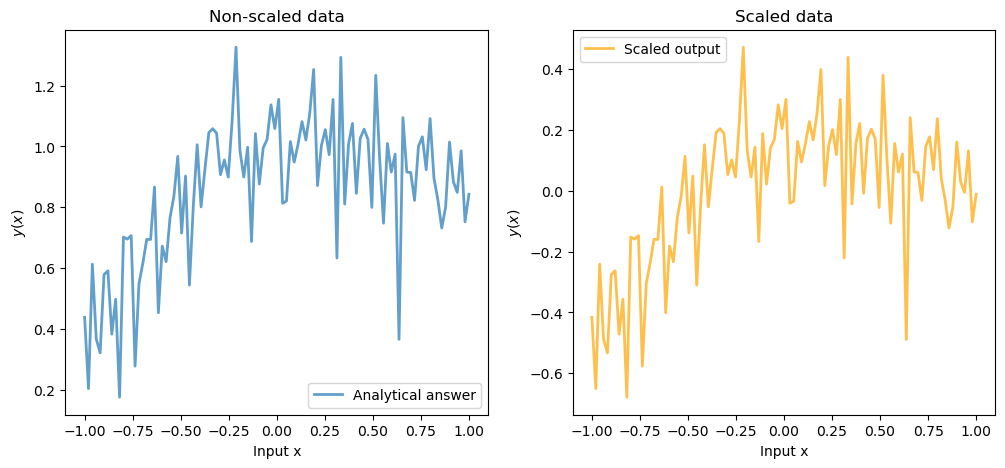

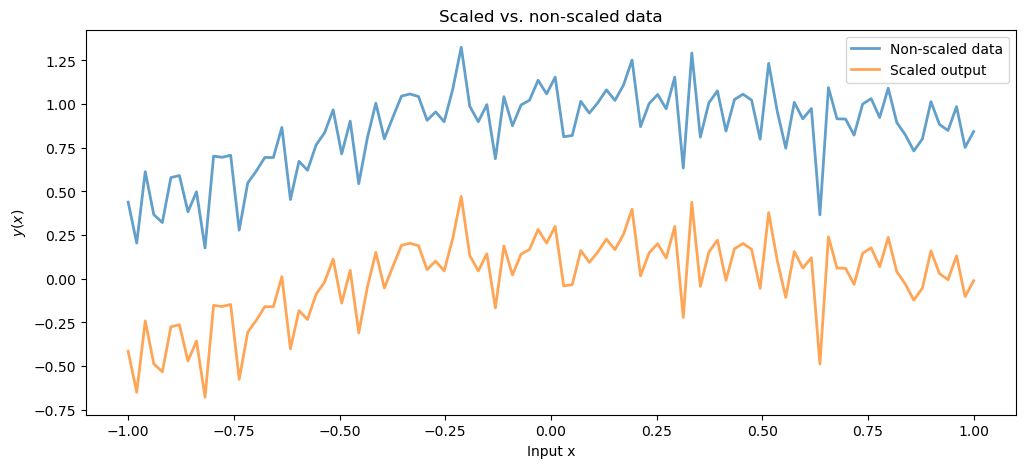

In [97]:
# test scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax1, ax2 = axes
ax1.set_xlabel(r'Input x')
ax1.set_ylabel(r'$y(x)$')
ax1.plot(x_full, y_full, alpha=0.7, lw=2,
            label='Analytical answer')
ax1.legend()
ax1.set_title(f"Non-scaled data")

x_full_mean = np.mean(x_full)
y_full_mean = np.mean(y_full)

x_scaled = x_full - x_full_mean
y_scaled = y_full - y_full_mean

ax2.set_xlabel(r'Input x')
ax2.set_ylabel(r'$y(x)$')
ax2.plot(x_scaled, y_scaled, alpha=0.7, lw=2, c="orange",
            label='Scaled output')
ax2.legend()
ax2.set_title(f"Scaled data")
plt.show()

# new plot
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
ax1 = axes
ax1.set_xlabel(r'Input x')
ax1.set_ylabel(r'$y(x)$')
ax1.plot(x_full, y_full, alpha=0.7, lw=2,
            label='Non-scaled data')

x_full_mean = np.mean(x_full)
y_full_mean = np.mean(y_full)

x_scaled = x_full - x_full_mean
y_scaled = y_full - y_full_mean

ax1.plot(x_scaled, y_scaled, alpha=0.7, lw=2,
            label='Scaled output')

ax1.legend()
ax1.set_title(f"Scaled vs. non-scaled data")
plt.show()

# the only change is in the units on the y axis, which is good

In [98]:
train_skl_mses_OLS_list = []
# two dimensional array to store errors for all polynomial degrees and all lambdas
train_skl_mses_Ridge_list = np.zeros((len(polynomial_degrees), len(lambdas)))
train_skl_r2_OLS_list = []
train_skl_r2_Ridge_list = np.zeros((len(polynomial_degrees), len(lambdas)))

test_skl_mses_OLS_list = []
test_skl_mses_Ridge_list = np.zeros((len(polynomial_degrees), len(lambdas)))
test_skl_r2_OLS_list = []
test_skl_r2_Ridge_list = np.zeros((len(polynomial_degrees), len(lambdas)))

lambda_results_dict = {}

for p_index, P in enumerate(polynomial_degrees):
    calc_feature_matrix = make_feature_matrix(x_full, P)

    X_train, X_test, y_train, y_test = train_test_split(calc_feature_matrix, y_full, test_size=0.2)

    X_train, y_train = scale_X_and_y(X_train, y_train)
    X_test, y_test = scale_X_and_y(X_test, y_test)

    ## manual OLS
    calc_beta_OLS = linear_regression_model_OLS(X_train, y_train)

    X_train_mean = np.mean(X_train,axis=0)
    y_scaler = np.mean(y_train)
    intercept_OLS = y_scaler - X_train_mean@calc_beta_OLS #The intercept can be shifted so the model can predict on uncentered data

    print(f"OLS intercept for P={P}: {intercept_OLS}")

    # include intercept with predictions
    y_tilde_OLS = linear_prediction(X_train, calc_beta_OLS) + y_scaler
    y_prediction_OLS = linear_prediction(X_test, calc_beta_OLS) + y_scaler

    # train scikit mse score
    skl_mse = mean_squared_error(y_train, y_tilde_OLS) 
    train_skl_mses_OLS_list.append(skl_mse)

    # train scikit r^2 score
    skl_r2 = r2_score(y_train, y_tilde_OLS)
    train_skl_r2_OLS_list.append(skl_r2)

    # test scikit mse score
    skl_mse = mean_squared_error(y_test, y_prediction_OLS) 
    test_skl_mses_OLS_list.append(skl_mse)

    print(f"OLS Test data MSE for P={P}: {skl_mse}")

    # test scikit r^2 score
    skl_r2 = r2_score(y_test, y_prediction_OLS)
    test_skl_r2_OLS_list.append(skl_r2)

    ## manual Ridge
    for l_index, lambda_value in enumerate(lambdas):
        calc_beta_ridge = linear_regression_model_Ridge(X_train, y_train, lambda_value)

        X_train_mean = np.mean(X_train,axis=0)
        y_scaler = np.mean(y_train)
        intercept_ridge = y_scaler - X_train_mean@calc_beta_ridge

        print(f"Ridge intercept for P={P}, lambda={lambda_value}: {intercept_ridge}")
        
        # include intercept with predictions
        y_tilde_ridge = linear_prediction(X_train, calc_beta_ridge) + y_scaler
        y_prediction_ridge = linear_prediction(X_test, calc_beta_ridge) + y_scaler

        # train scikit mse score
        skl_mse = mean_squared_error(y_train, y_tilde_ridge) 
        train_skl_mses_Ridge_list[p_index, l_index] = skl_mse

        # saving the result for a specific lambda, but with all polynomial degrees
        # it starts with zero values but as the top level loop runs it will fill up this array and overwrite
        # ending up with a single list that covers all polynomial degrees at a specific lambda
        lambda_results_dict[f"lambda_{l_index}_train_skl_mses_Ridge_list"] = train_skl_mses_Ridge_list[:, l_index]

        # train scikit r^2 score
        skl_r2 = r2_score(y_train, y_tilde_ridge)
        train_skl_r2_Ridge_list[p_index, l_index] = skl_r2

        lambda_results_dict[f"lambda_{l_index}_train_skl_r2_Ridge_list"] = train_skl_r2_Ridge_list[:, l_index]

        # test scikit mse score
        skl_mse = mean_squared_error(y_test, y_prediction_ridge) 
        test_skl_mses_Ridge_list[p_index, l_index] = skl_mse

        lambda_results_dict[f"lambda_{l_index}_test_skl_mses_Ridge_list"] = test_skl_mses_Ridge_list[:, l_index]

        print(f"Ridge Test data MSE for P={P}, lambda={lambda_value}: {skl_mse}")

        # test scikit r^2 score
        skl_r2 = r2_score(y_test, y_prediction_ridge)
        test_skl_r2_Ridge_list[p_index, l_index] = skl_r2

        lambda_results_dict[f"lambda_{l_index}_test_skl_r2_Ridge_list"] = test_skl_r2_Ridge_list[:, l_index]

OLS intercept for P=5: 9.887016671305123e-17
OLS Test data MSE for P=5: 0.01838590006808084
Ridge intercept for P=5, lambda=0.0001: 9.887859163765554e-17
Ridge Test data MSE for P=5, lambda=0.0001: 0.01838484509465744
Ridge intercept for P=5, lambda=0.001: 9.895416434165231e-17
Ridge Test data MSE for P=5, lambda=0.001: 0.018375396423161838
Ridge intercept for P=5, lambda=0.01: 9.968578682559681e-17
Ridge Test data MSE for P=5, lambda=0.01: 0.018285282546448744
Ridge intercept for P=5, lambda=0.1: 1.0519482669793199e-16
Ridge Test data MSE for P=5, lambda=0.1: 0.017687400288600618
Ridge intercept for P=5, lambda=1.0: 1.185722552214109e-16
Ridge Test data MSE for P=5, lambda=1.0: 0.016988949595240197
Ridge intercept for P=5, lambda=10: 1.2662055222200132e-16
Ridge Test data MSE for P=5, lambda=10: 0.020001468984114004
OLS intercept for P=10: -2.454308038091683e-16
OLS Test data MSE for P=10: 0.025687905474576833
Ridge intercept for P=10, lambda=0.0001: -1.837055897264906e-16
Ridge Test 

polynomial_degrees[0]: P=5


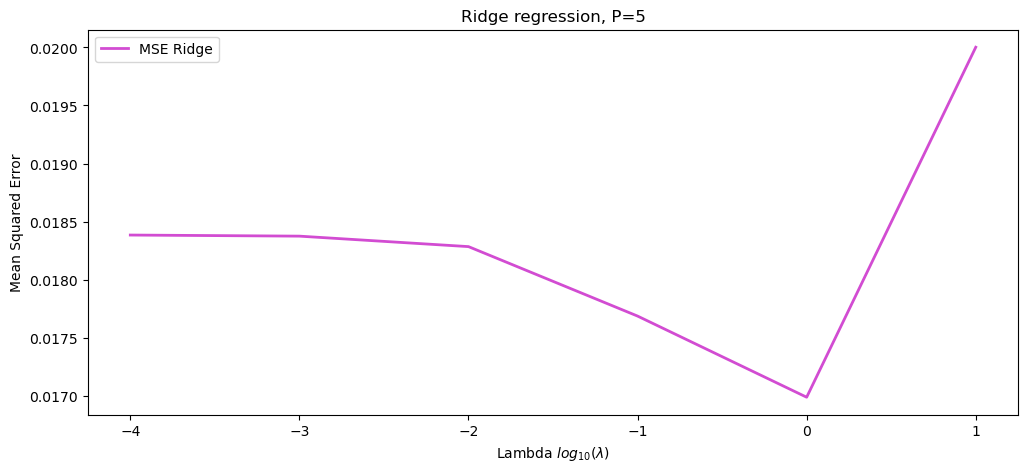

polynomial_degrees[1]: P=10


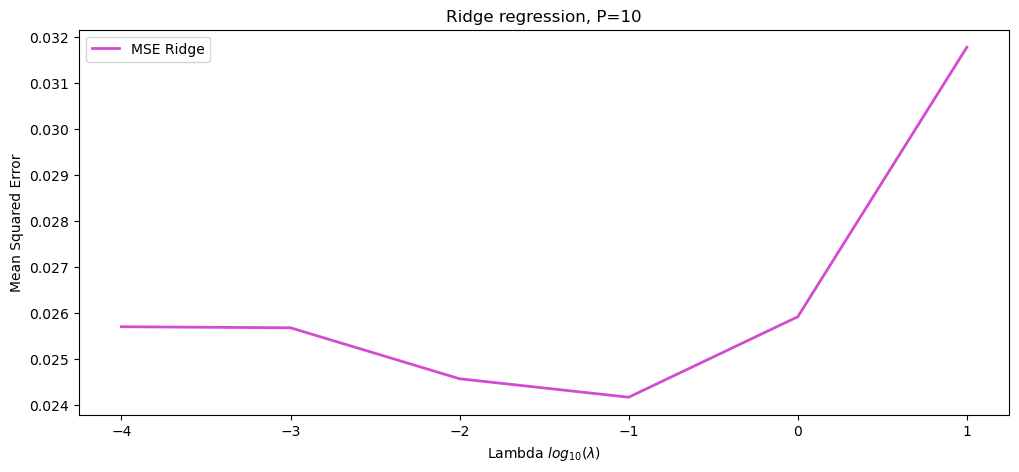

polynomial_degrees[2]: P=15


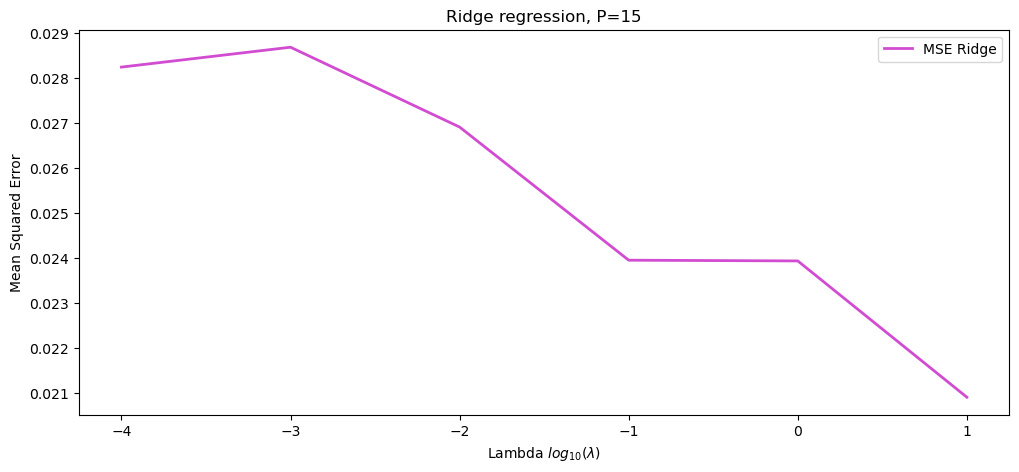

In [99]:
# for a given polynomial degree, what is the error plotted against lambda (like lecture notes)
for i, P in enumerate(polynomial_degrees):
    # change how our list is constructed - we access a list of MSEs over all Ps for each lambda
    # we want the opposite, so that we have all MSEs for each lambda selected by a P
    test_lambda_mses_Ridge = [lambda_results_dict[f"lambda_{l_index}_test_skl_mses_Ridge_list"][i] for l_index in range(len(lambdas))]

    print(f"polynomial_degrees[{i}]: P={P}")
    fig, axes = plt.subplots(1, 1, figsize=(12, 5))
    ax1 = axes

    ax1.set_xlabel(r'Lambda $log_{10}(\lambda)$')
    ax1.set_ylabel(r'Mean Squared Error')
    ax1.plot(np.log10(lambdas), test_lambda_mses_Ridge, alpha=0.7, lw=2, c='m',
                label='MSE Ridge')
    ax1.legend()
    ax1.set_title(f"Ridge regression, P={P}")

    plt.show()

In [100]:
# OLS stays constant (does not depend on lambda)
# but plot the ridge regressions for each lambda alongside the ols answer

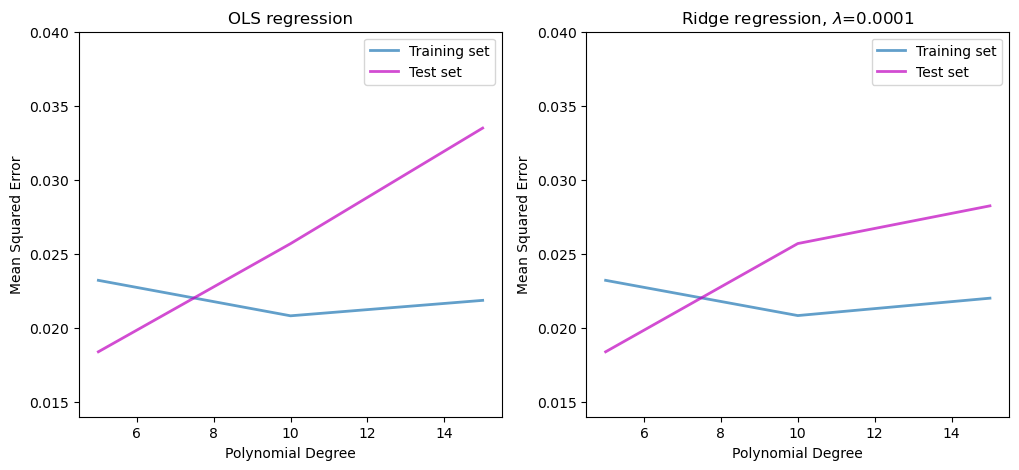

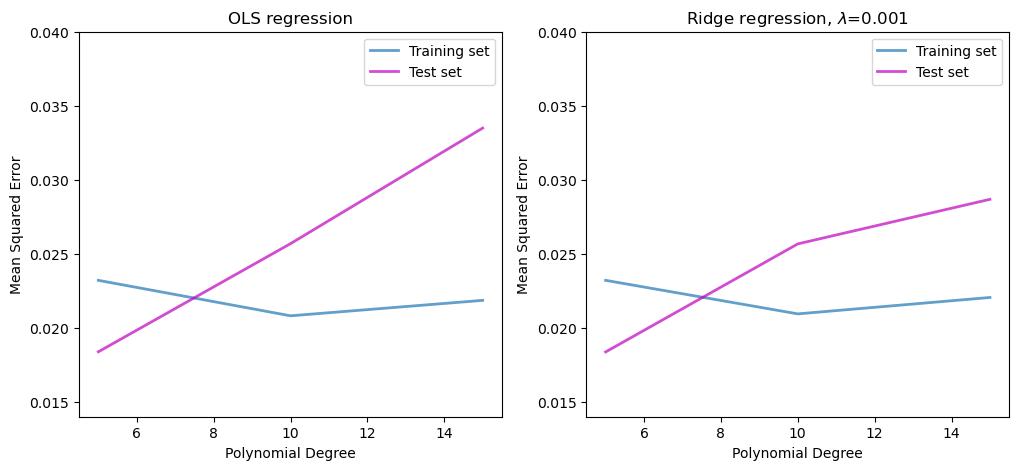

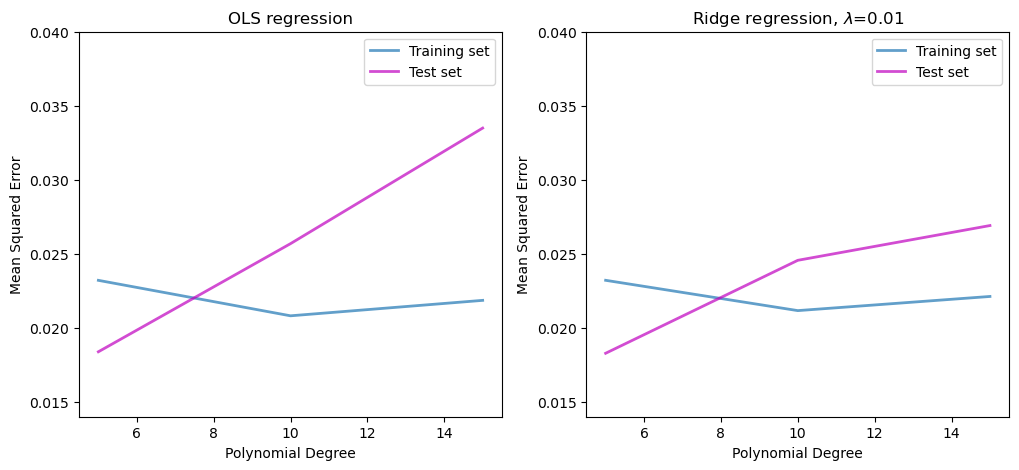

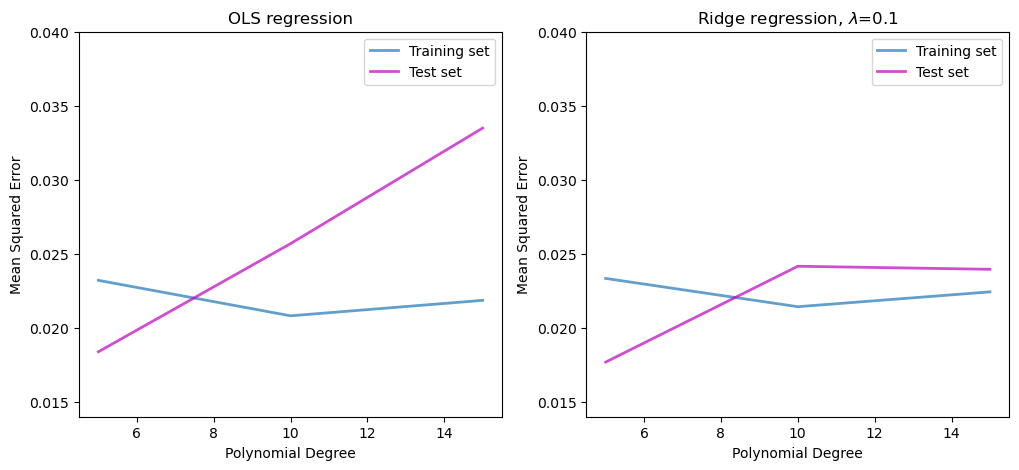

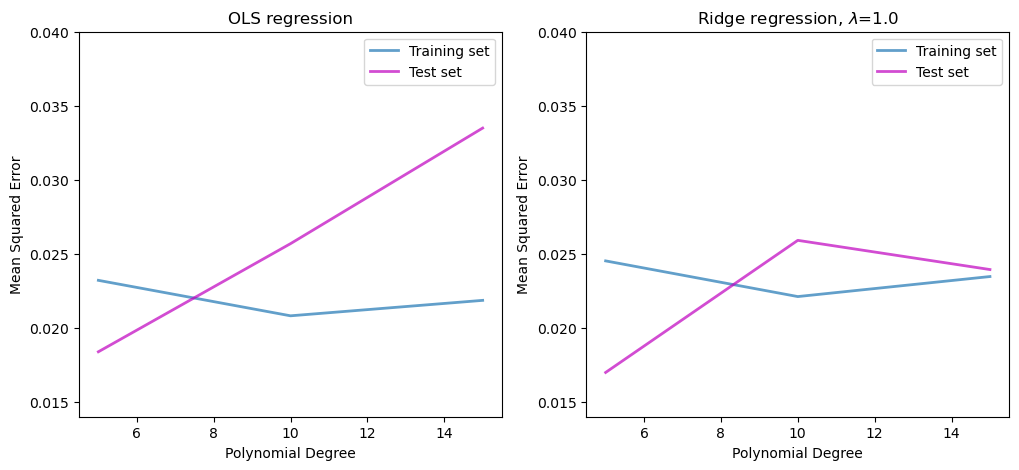

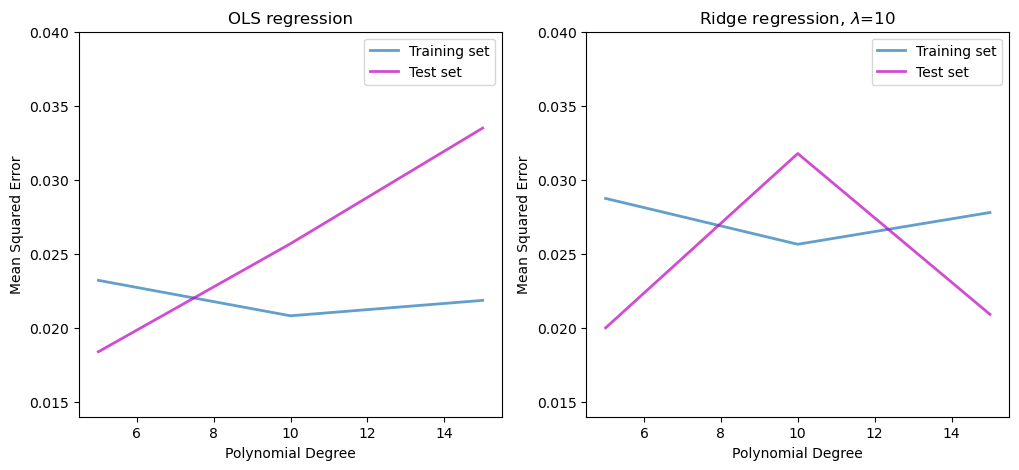

In [101]:
for l_index, lambda_value in enumerate(lambdas):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    ax1, ax2 = axes

    ax1.set_xlabel(r'Polynomial Degree')
    ax1.set_ylabel(r'Mean Squared Error')
    ax1.plot(polynomial_degrees, train_skl_mses_OLS_list, alpha=0.7, lw=2,
                label='Training set')
    ax1.plot(polynomial_degrees, test_skl_mses_OLS_list, alpha=0.7, lw=2, c='m',
                label='Test set')
    ax1.set_ylim([0.014, 0.040])
    ax1.legend()
    ax1.set_title("OLS regression")

    ax2.set_xlabel(r'Polynomial Degree')
    ax2.set_ylabel(r'Mean Squared Error')
    ax2.plot(polynomial_degrees, lambda_results_dict[f"lambda_{l_index}_train_skl_mses_Ridge_list"], alpha=0.7, lw=2,
                label='Training set')
    ax2.plot(polynomial_degrees, lambda_results_dict[f"lambda_{l_index}_test_skl_mses_Ridge_list"], alpha=0.7, lw=2, c='m',
                label='Test set')
    ax2.set_ylim([0.014, 0.040])
    ax2.legend()
    ax2.set_title(f"Ridge regression, "+r"$\lambda$"+f"={lambdas[l_index]}")

    plt.show()

# Answer 2 Discussion

OLS regression and results are conceptually the same as last week. Training gets better with polynomial degree, but due to overfitting accuracy falls on the test set. Ridge regression starts out the same with a very small $\lambda$, but as lambda gets larger we start to suppress the extra terms and achieve less overfitting. The training error starts increasing however, but the accuracy for the test set is better at high polynomial degrees.

Overall, we either want to use a low degree polynomial and any lambda, *or* a high degree polynomial with a high lambda. The middle ranges of both give the worst scoring results. By choosing one of the two extremes, we can get better results than simple OLS.

This code has re-included the intercept, and doesn't give meaningful results without it. Scaling the data does not change much, scaling with intercept is much the same as not scaling with intercept. Taking out intercept without scaling does not work.

### Extra, $R^2$ plot

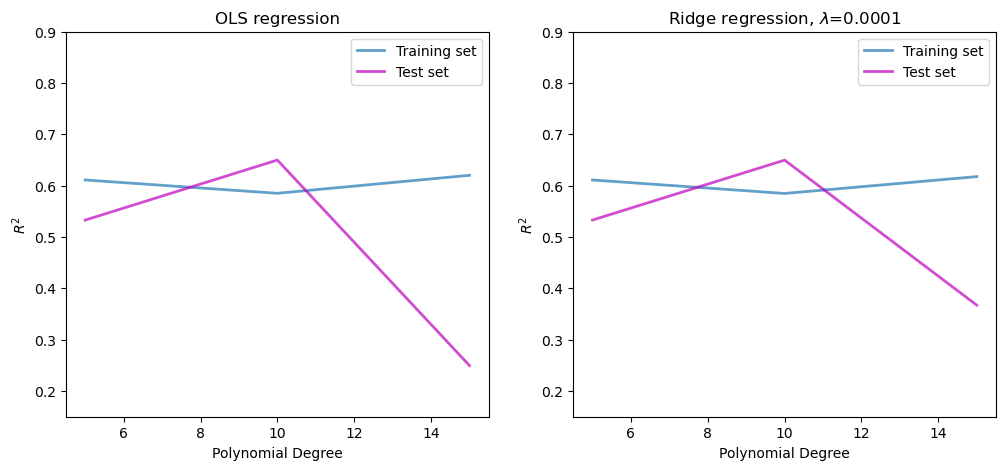

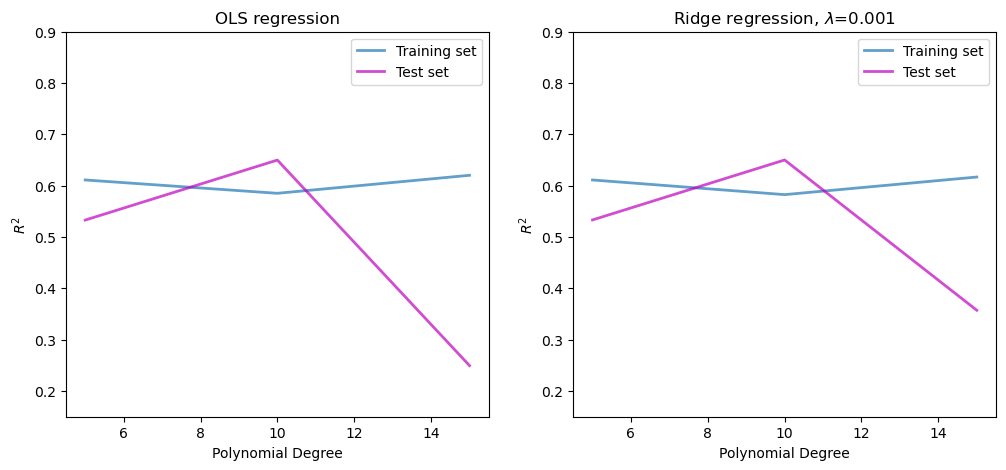

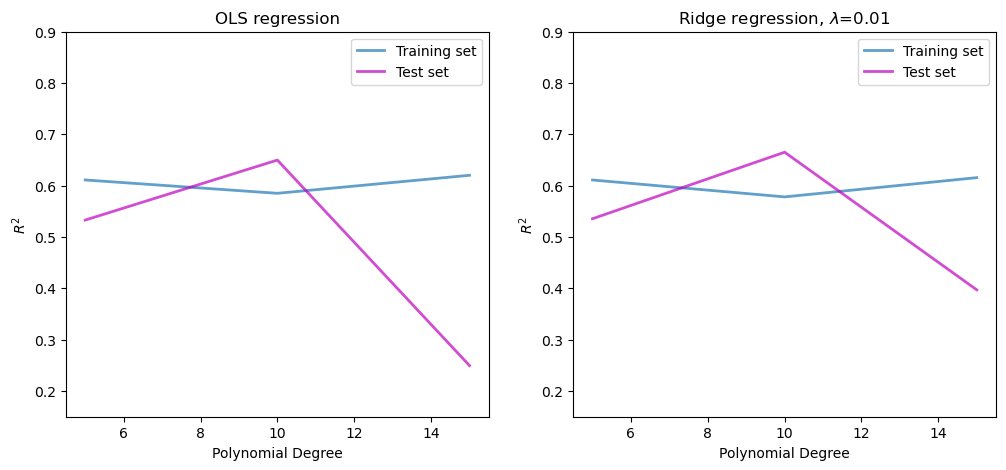

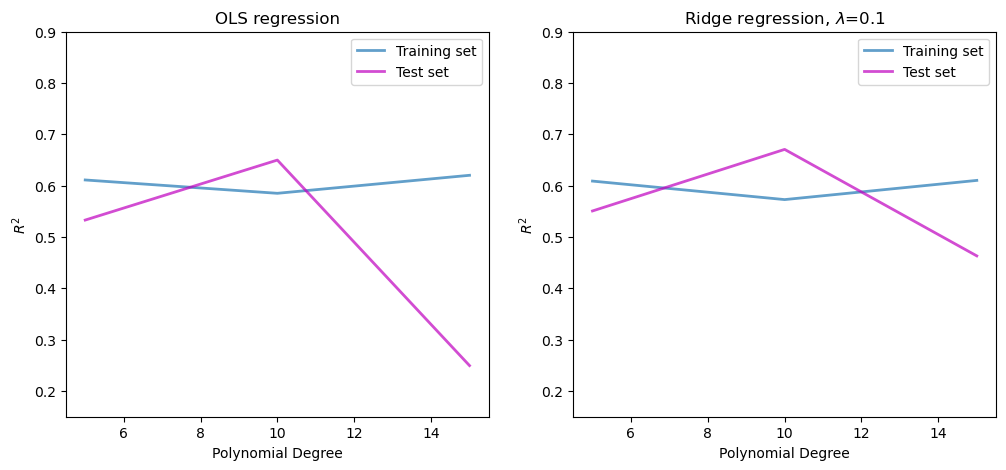

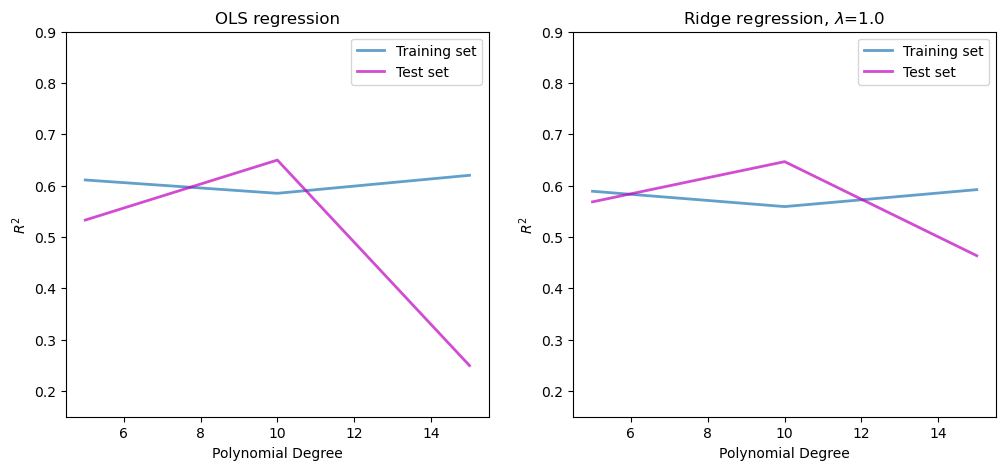

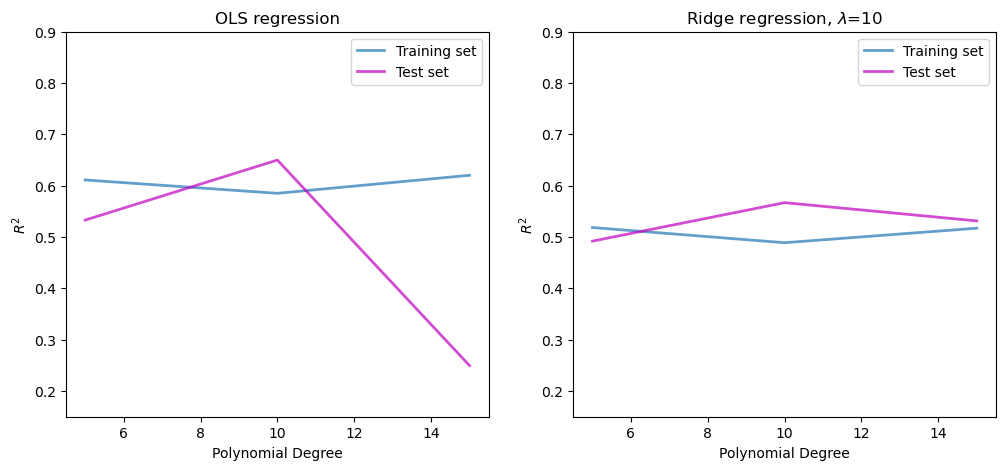

In [102]:
for l_index, lambda_value in enumerate(lambdas):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    ax1, ax2 = axes

    ax1.set_xlabel(r'Polynomial Degree')
    ax1.set_ylabel(r'$R^2$')
    ax1.plot(polynomial_degrees, train_skl_r2_OLS_list, alpha=0.7, lw=2,
                label='Training set')
    ax1.plot(polynomial_degrees, test_skl_r2_OLS_list, alpha=0.7, lw=2, c='m',
                label='Test set')
    ax1.set_ylim([0.15, 0.90])
    ax1.legend()
    ax1.set_title("OLS regression")

    ax2.set_xlabel(r'Polynomial Degree')
    ax2.set_ylabel(r'$R^2$')
    ax2.plot(polynomial_degrees, lambda_results_dict[f"lambda_{l_index}_train_skl_r2_Ridge_list"], alpha=0.7, lw=2,
                label='Training set')
    ax2.plot(polynomial_degrees, lambda_results_dict[f"lambda_{l_index}_test_skl_r2_Ridge_list"], alpha=0.7, lw=2, c='m',
                label='Test set')
    ax2.set_ylim([0.15, 0.90])
    ax2.legend()
    ax2.set_title(f"Ridge regression, "+r"$\lambda$"+f"={lambdas[l_index]}")

    plt.show()